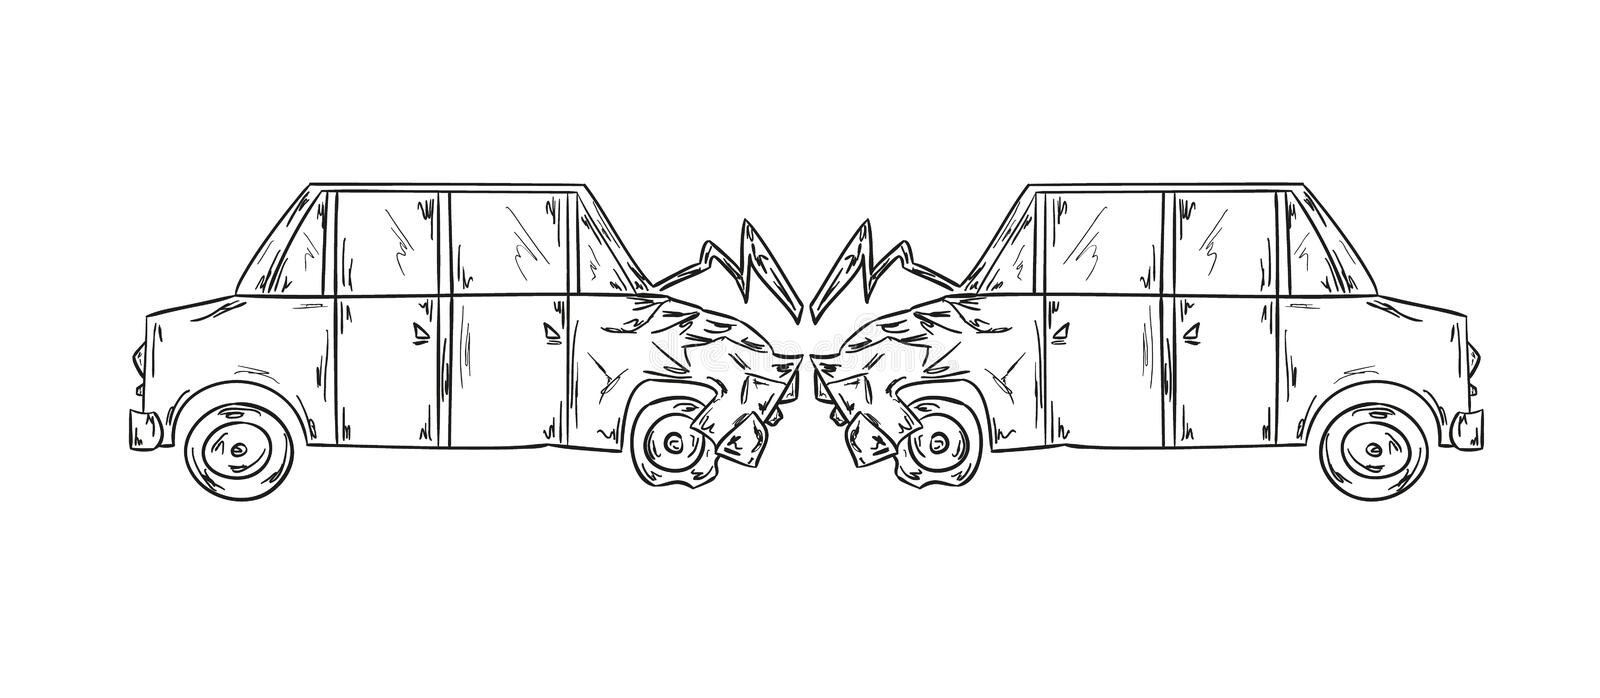

<h3 align="Center">Data Analysis for Car Accidents in Kingdom of Saudi Arabia ||| تحليل بيانات حوادث السيارات في المملكة العربية السعودية  </h3> 
<h5 align="center"> Done by : Abdulrahman Aljubaylan </h5>

<h6 align="Center">Before you see my work I really would like to thank you that you took a part of your time to view my work I really hope you enjoy it</h6>
<h6 align="Center">if you have any notices please don't hesitate to reachout to me so I can develop the project more.</h6>


<h3>Business Understanding</h3>

The Objective in this project to analyze car accidents statistics and gain insghts and Develop my practical skills  

The Data been Retrived from Saudi Open Data Website ( https://data.gov.sa/ )

<h3>Data Collection</h3>

In [294]:
import numpy as np
import pandas as pd
import arabic_reshaper
from IPython import display
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import pyarabic.araby as araby
from matplotlib.pyplot import *
from IPython.display import display
from bidi.algorithm import get_display
from pandas_profiling import ProfileReport
from matplotlib.pyplot import figure
%matplotlib inline
style.use('seaborn-ticks')

In [295]:
#Load Data
PATH = r"C:\Users\aalju\Downloads\traffic-accident-statistics-as-of-1437-h.csv"
df = pd.read_csv(PATH)
df1= df.copy()
df11= df.copy()

<h3>Data Preparation</h3>

In [296]:
# Show the the count of rows and columns
df1.shape

(13, 73)

In [297]:
#  display all columns
pd.set_option("display.max_columns", None)
# display the data header
df1.head(1)

,الشهر,حادث تلفيات,حادث اصابات,حادث وفيات,مجموع عدد الحوادث,السبت,الا حد,الاثنين,الثلاثاء,الا ربعاء,الخميس,الجمعة,مجموع عدد الحوادث لجميع الأيام,نهارا,ليلا,مجموع عدد الحوادث حسب الوقت,داخل المدينة,خارج المدينة,مجموع عدد الحوادث حسب مكان الحادث,صغيرة,جيب,حافلة,ونيت,نقل,وايت,اخرى,مجموع عدد السيارات المشتركة في الحوادث حسب الطراز,-18.0,18+,30+,40+,50+,المجموع حسب العمر,سعودي,اجنبي,المجموع حسب الجنسية,متزوج,اعزب,المجموع حسب الحالة الاجتماعية,متعلم,امى,المجموع حسب الحالة التعليمية,نوع الرخصة خصوصى,نوع الرخصة عمومى,نوع الرخصة اليات,نوع الرخصة دراجة,السائق لا يحمل رخصة قيادة,المجموع,السائق لا يحمل رخصة قيادة.1,الرخصة سارية,الرخصة منتهية,المجموع.1,تصادم مع سيارة,تصادم مع جسم ثابت,دهس مشاة,دهس حيوان,حريق,انقلاب,خروج عن الطريق,أخرى,المجموع.2,توقف غير نظامى,دوران غير نظامى,تجاوز غير نظامى,عدم التقيد بالاشارة,السرعة الزائدة,السائق تحت تأثير مخدر,اخرى.1,مجموع الحوادث حسب سبب الحادث,عدد المصابين,عدد المتوفين (القتلى),سليم,مجموع الأشخاص المشمولين بالحوادث
0,محرم,4405.0,119.0,55.0,4579.0,650.0,637.0,616.0,626.0,705.0,679.0,666.0,4579.0,2953.0,1626.0,4579.0,3214.0,1365.0,4579.0,3844.0,1827.0,310.0,1796.0,399.0,208.0,41.0,8425.0,364.0,2179.0,3220.0,2297.0,332.0,8392.0,5346.0,3046.0,8392.0,3849.0,4543.0,8392.0,8292.0,100.0,8392.0,4145.0,3416.0,232.0,384.0,215.0,8392.0,215.0,7904.0,273.0,8392.0,4229.0,79.0,37.0,3.0,0.0,43.0,113.0,75.0,4579.0,1166.0,370.0,460.0,1135.0,1416.0,0.0,32.0,4579.0,237.0,82.0,8752.0,9071.0


In [298]:
# make a simple loop for columns to remove spaces 
for col in df1.columns:
    df1.rename(columns={col:col.replace(" ","_")},inplace=True)

In [299]:
#  display all columns
pd.set_option("display.max_columns", None)
# display the data header
df1.head(1)

,الشهر,حادث_تلفيات,حادث_اصابات,حادث_وفيات,_مجموع_عدد_الحوادث,السبت,الا_حد,الاثنين,الثلاثاء,الا_ربعاء,الخميس,الجمعة,مجموع_عدد_الحوادث_لجميع_الأيام,نهارا,ليلا,مجموع_عدد_الحوادث_حسب_الوقت,داخل_المدينة,خارج_المدينة,مجموع_عدد_الحوادث_حسب_مكان_الحادث,صغيرة,جيب,حافلة,ونيت,نقل,وايت,اخرى,مجموع_عدد_السيارات_المشتركة_في_الحوادث_حسب_الطراز,-18.0,18+,30+,40+,50+,المجموع_حسب_العمر,سعودي_,اجنبي,المجموع_حسب_الجنسية,متزوج,اعزب,المجموع_حسب_الحالة_الاجتماعية,متعلم_,امى,المجموع_حسب_الحالة_التعليمية,نوع_الرخصة_خصوصى,نوع_الرخصة_عمومى,نوع_الرخصة_اليات_,نوع_الرخصة_دراجة,السائق_لا_يحمل_رخصة_قيادة,المجموع,السائق_لا_يحمل_رخصة_قيادة.1,الرخصة_سارية_,الرخصة_منتهية,المجموع.1,تصادم_مع_سيارة,تصادم_مع_جسم_ثابت,دهس_مشاة,دهس_حيوان,حريق,انقلاب,خروج_عن_الطريق,أخرى,المجموع.2,توقف_غير_نظامى,دوران_غير_نظامى,تجاوز_غير_نظامى,عدم_التقيد_بالاشارة,السرعة_الزائدة,السائق_تحت_تأثير_مخدر,اخرى.1,مجموع_الحوادث_حسب_سبب_الحادث,عدد_المصابين,عدد_المتوفين_(القتلى),سليم,مجموع_الأشخاص_المشمولين_بالحوادث
0,محرم,4405.0,119.0,55.0,4579.0,650.0,637.0,616.0,626.0,705.0,679.0,666.0,4579.0,2953.0,1626.0,4579.0,3214.0,1365.0,4579.0,3844.0,1827.0,310.0,1796.0,399.0,208.0,41.0,8425.0,364.0,2179.0,3220.0,2297.0,332.0,8392.0,5346.0,3046.0,8392.0,3849.0,4543.0,8392.0,8292.0,100.0,8392.0,4145.0,3416.0,232.0,384.0,215.0,8392.0,215.0,7904.0,273.0,8392.0,4229.0,79.0,37.0,3.0,0.0,43.0,113.0,75.0,4579.0,1166.0,370.0,460.0,1135.0,1416.0,0.0,32.0,4579.0,237.0,82.0,8752.0,9071.0


In [300]:
# first lets see the data types so we can know what are we dealing with
#types = pd.DataFrame(df1.dtypes)
#types

In [301]:
# display the columns names
df1.columns

Index(['الشهر', 'حادث_تلفيات', 'حادث_اصابات', 'حادث_وفيات',
       '_مجموع_عدد_الحوادث', 'السبت', 'الا_حد', 'الاثنين', 'الثلاثاء',
       'الا_ربعاء', 'الخميس', 'الجمعة', 'مجموع_عدد_الحوادث_لجميع_الأيام',
       'نهارا', 'ليلا', 'مجموع_عدد_الحوادث_حسب_الوقت', 'داخل_المدينة',
       'خارج_المدينة', 'مجموع_عدد_الحوادث_حسب_مكان_الحادث', 'صغيرة', 'جيب',
       'حافلة', 'ونيت', 'نقل', 'وايت', 'اخرى',
       'مجموع_عدد_السيارات_المشتركة_في_الحوادث_حسب_الطراز', '-18.0', '18+',
       '30+', '40+', '50+', 'المجموع_حسب_العمر', 'سعودي_', 'اجنبي',
       'المجموع_حسب_الجنسية', 'متزوج', 'اعزب', 'المجموع_حسب_الحالة_الاجتماعية',
       'متعلم_', 'امى', 'المجموع_حسب_الحالة_التعليمية', 'نوع_الرخصة_خصوصى',
       'نوع_الرخصة_عمومى', 'نوع_الرخصة_اليات_', 'نوع_الرخصة_دراجة',
       'السائق_لا_يحمل_رخصة_قيادة', 'المجموع', 'السائق_لا_يحمل_رخصة_قيادة.1',
       'الرخصة_سارية_', 'الرخصة_منتهية', 'المجموع.1', 'تصادم_مع_سيارة',
       'تصادم_مع_جسم_ثابت', 'دهس_مشاة', 'دهس_حيوان', 'حريق', 'انقلاب',
       'خروج

In [302]:
#df1.replace({"محرم": "Muharram"}, inplace=True)
df1.الشهر.replace(['محرم','صفر','ربيع أول','ربيع ثانى','جمادى أول','جمادى ثانى','رجب','شعبان','رمضان','شوال','ذى القعدة','ذى الحجة'],
                  ['Muharram','Safar','Rabi al-Awwal','Rabi al-Thani','Jumada al-Awwal','Jumada al-Thani','Rajab',"Sha'ban",'Ramadan','Shawwal','Dhul-Qidah','Dhul-Hijjah'], inplace=True)

In [303]:
# rename the columns to make it more smooth to handle since the columns more then 70
df1.columns=["Col"+str(i) for i in range(0, 73)]

In [304]:
df.head(1)

,الشهر,حادث تلفيات,حادث اصابات,حادث وفيات,مجموع عدد الحوادث,السبت,الا حد,الاثنين,الثلاثاء,الا ربعاء,الخميس,الجمعة,مجموع عدد الحوادث لجميع الأيام,نهارا,ليلا,مجموع عدد الحوادث حسب الوقت,داخل المدينة,خارج المدينة,مجموع عدد الحوادث حسب مكان الحادث,صغيرة,جيب,حافلة,ونيت,نقل,وايت,اخرى,مجموع عدد السيارات المشتركة في الحوادث حسب الطراز,-18.0,18+,30+,40+,50+,المجموع حسب العمر,سعودي,اجنبي,المجموع حسب الجنسية,متزوج,اعزب,المجموع حسب الحالة الاجتماعية,متعلم,امى,المجموع حسب الحالة التعليمية,نوع الرخصة خصوصى,نوع الرخصة عمومى,نوع الرخصة اليات,نوع الرخصة دراجة,السائق لا يحمل رخصة قيادة,المجموع,السائق لا يحمل رخصة قيادة.1,الرخصة سارية,الرخصة منتهية,المجموع.1,تصادم مع سيارة,تصادم مع جسم ثابت,دهس مشاة,دهس حيوان,حريق,انقلاب,خروج عن الطريق,أخرى,المجموع.2,توقف غير نظامى,دوران غير نظامى,تجاوز غير نظامى,عدم التقيد بالاشارة,السرعة الزائدة,السائق تحت تأثير مخدر,اخرى.1,مجموع الحوادث حسب سبب الحادث,عدد المصابين,عدد المتوفين (القتلى),سليم,مجموع الأشخاص المشمولين بالحوادث
0,محرم,4405.0,119.0,55.0,4579.0,650.0,637.0,616.0,626.0,705.0,679.0,666.0,4579.0,2953.0,1626.0,4579.0,3214.0,1365.0,4579.0,3844.0,1827.0,310.0,1796.0,399.0,208.0,41.0,8425.0,364.0,2179.0,3220.0,2297.0,332.0,8392.0,5346.0,3046.0,8392.0,3849.0,4543.0,8392.0,8292.0,100.0,8392.0,4145.0,3416.0,232.0,384.0,215.0,8392.0,215.0,7904.0,273.0,8392.0,4229.0,79.0,37.0,3.0,0.0,43.0,113.0,75.0,4579.0,1166.0,370.0,460.0,1135.0,1416.0,0.0,32.0,4579.0,237.0,82.0,8752.0,9071.0


In [305]:
df1.head(1)

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24,Col25,Col26,Col27,Col28,Col29,Col30,Col31,Col32,Col33,Col34,Col35,Col36,Col37,Col38,Col39,Col40,Col41,Col42,Col43,Col44,Col45,Col46,Col47,Col48,Col49,Col50,Col51,Col52,Col53,Col54,Col55,Col56,Col57,Col58,Col59,Col60,Col61,Col62,Col63,Col64,Col65,Col66,Col67,Col68,Col69,Col70,Col71,Col72
0,Muharram,4405.0,119.0,55.0,4579.0,650.0,637.0,616.0,626.0,705.0,679.0,666.0,4579.0,2953.0,1626.0,4579.0,3214.0,1365.0,4579.0,3844.0,1827.0,310.0,1796.0,399.0,208.0,41.0,8425.0,364.0,2179.0,3220.0,2297.0,332.0,8392.0,5346.0,3046.0,8392.0,3849.0,4543.0,8392.0,8292.0,100.0,8392.0,4145.0,3416.0,232.0,384.0,215.0,8392.0,215.0,7904.0,273.0,8392.0,4229.0,79.0,37.0,3.0,0.0,43.0,113.0,75.0,4579.0,1166.0,370.0,460.0,1135.0,1416.0,0.0,32.0,4579.0,237.0,82.0,8752.0,9071.0


In [306]:
# we need to change the columns names so we can control it better
df1 = df1.rename(columns={"Col0":"Month","Col1":"damage Accident","Col2":"accident injuries","Col3":"fatal Accident","Col4":"total number of accidents","Col5":"saturday","Col6":"sunday","Col7":"monday","Col8":"tuesday","Col9":"wednesday",
                          "Col10":"thursday","Col11":"friday","Col12":"total number of accidents all days","Col13":"midday","Col14":"night","Col15":"total num of accidents based on time","Col16":"inside city","Col17":"outside city","Col18":"total number of accidents based on Location","Col19":"sedan",
                          "Col20":"suv","Col21":"bus","Col22":"pickup","Col23":"coach","Col24":"tanker","Col25":"other","Col26":"Total number of cars in accidents by model","Col27":"-18.0","Col28":"18+","Col29":"30+",
                          "Col30":"40+","Col31":"50+","Col32":"total by age","Col33":"saudi","Col34":"foreign","Col35":"total by nationality","Col36":"married","Col37":"single","Col38":"total by social status","Col39":"educated",
                          "Col40":"illiterate","Col41":"total by educational status","Col42":"private license","Col43":"public license","Col44":"machine license","Col45":"bicycle license","Col46":"the driver doesnt have driver's license","Col47":"total","Col48":"the driver doesnt have driver's license","Col49":"valid license",
                          "Col50":"expired license","Col51":"total","Col52":"collision with a car","Col53":"collision with a stationary object","Col54":"run over pedestrians","Col55":"run over an animal","Col56":"fire","Col57":"rollover","Col58":"out of the way","Col59":"other",
                          "Col60":"total","Col61":"irregular stop","Col62":"irregular rotation","Col63":"irregular bypass","Col64":"failure to comply with the traffic signal","Col65":"Overspeed","Col66":"driver under the influence","Col67":"other","Col68":"total accidents by accident cause","Col69":"number of injured",
                          "Col70":"number of dead","Col71":"healthy","Col72":"total number of people involved in the accidents"})

In [307]:
# count of total null values 
df1.isnull().sum().sum()

0

In [308]:
df1.to_excel('cars_accidents_stat.xlsx')

<h3>Exploratory Data Analysis (EDA)</h3>

In [309]:
df1.head(1)

,Month,damage Accident,accident injuries,fatal Accident,total number of accidents,saturday,sunday,monday,tuesday,wednesday,thursday,friday,total number of accidents all days,midday,night,total num of accidents based on time,inside city,outside city,total number of accidents based on Location,sedan,suv,bus,pickup,coach,tanker,other,Total number of cars in accidents by model,-18.0,18+,30+,40+,50+,total by age,saudi,foreign,total by nationality,married,single,total by social status,educated,illiterate,total by educational status,private license,public license,machine license,bicycle license,the driver doesnt have driver's license,total,the driver doesnt have driver's license,valid license,expired license,total,collision with a car,collision with a stationary object,run over pedestrians,run over an animal,fire,rollover,out of the way,other,total,irregular stop,irregular rotation,irregular bypass,failure to comply with the traffic signal,Overspeed,driver under the influence,other,total accidents by accident cause,number of injured,number of dead,healthy,total number of people involved in the accidents
0,Muharram,4405.0,119.0,55.0,4579.0,650.0,637.0,616.0,626.0,705.0,679.0,666.0,4579.0,2953.0,1626.0,4579.0,3214.0,1365.0,4579.0,3844.0,1827.0,310.0,1796.0,399.0,208.0,41.0,8425.0,364.0,2179.0,3220.0,2297.0,332.0,8392.0,5346.0,3046.0,8392.0,3849.0,4543.0,8392.0,8292.0,100.0,8392.0,4145.0,3416.0,232.0,384.0,215.0,8392.0,215.0,7904.0,273.0,8392.0,4229.0,79.0,37.0,3.0,0.0,43.0,113.0,75.0,4579.0,1166.0,370.0,460.0,1135.0,1416.0,0.0,32.0,4579.0,237.0,82.0,8752.0,9071.0


In [310]:
# remove last column becouse the total it would affect the results for some plots
df1 = df1.iloc[:-1 , :]

# Regular Visualization 

Text(0.5, 1.0, 'accidents per Month')

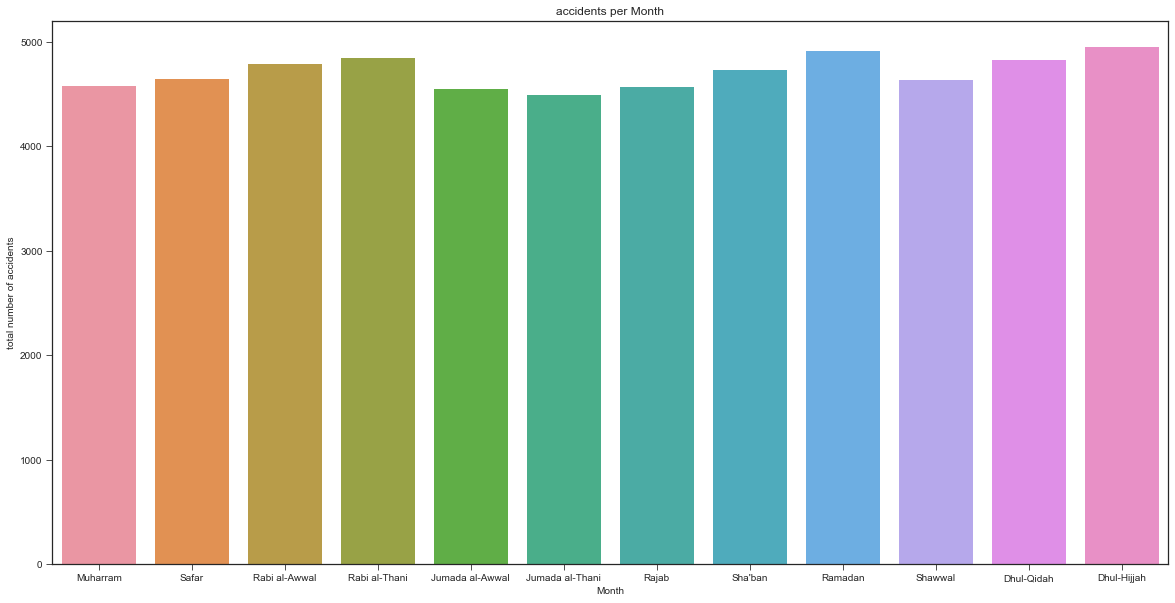

In [338]:
plt.rcParams["figure.figsize"] = (20,10)
sns.barplot(data=df1, x="Month", y="total number of accidents")
plt.title('accidents per Month')

Text(0.5, 1.0, 'accidents per Nationality')

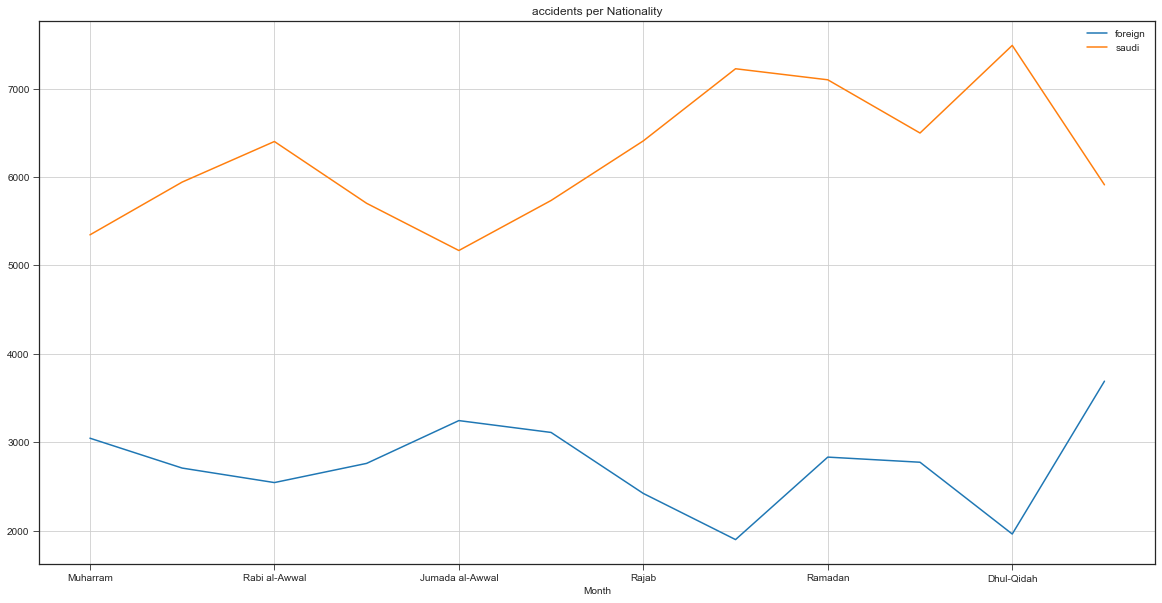

In [337]:
df1.plot(x='Month', y=['foreign', 'saudi'], figsize=(20,10), grid=True)
plt.title('accidents per Nationality')

Text(0.5, 1.0, 'License Type VS Period')

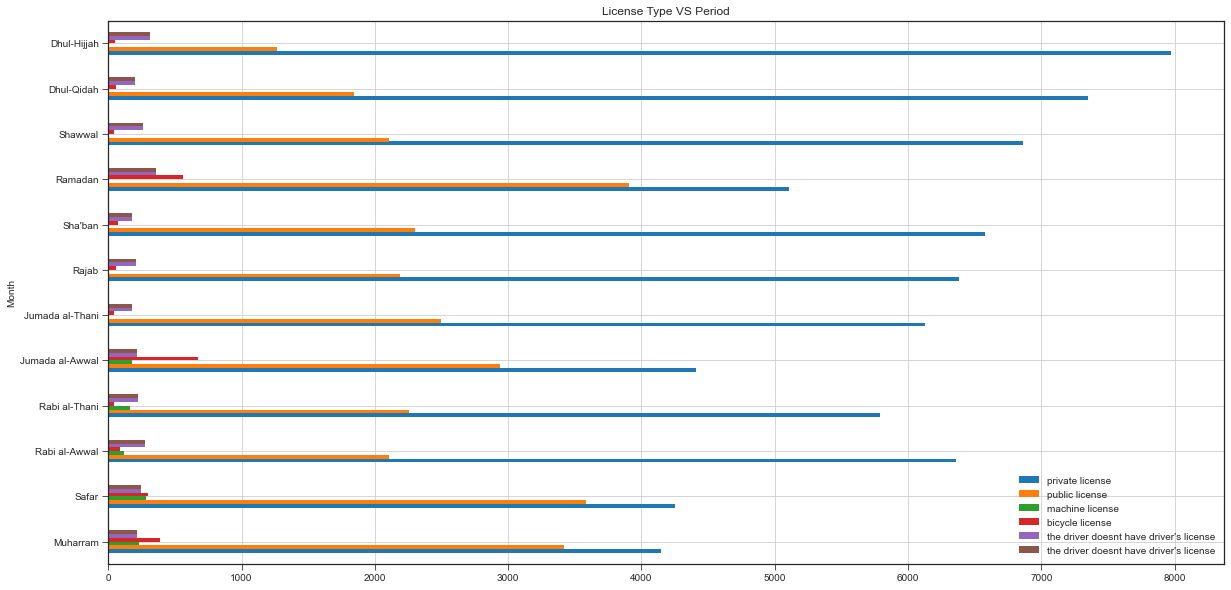

In [342]:
df1.plot(x='Month', y=['private license','public license','machine license','bicycle license',"the driver doesnt have driver's license"], figsize=(20,10), grid=True,kind="barh")
plt.title('License Type VS Period')

Text(0.5, 1.0, 'Social Status VS Period')

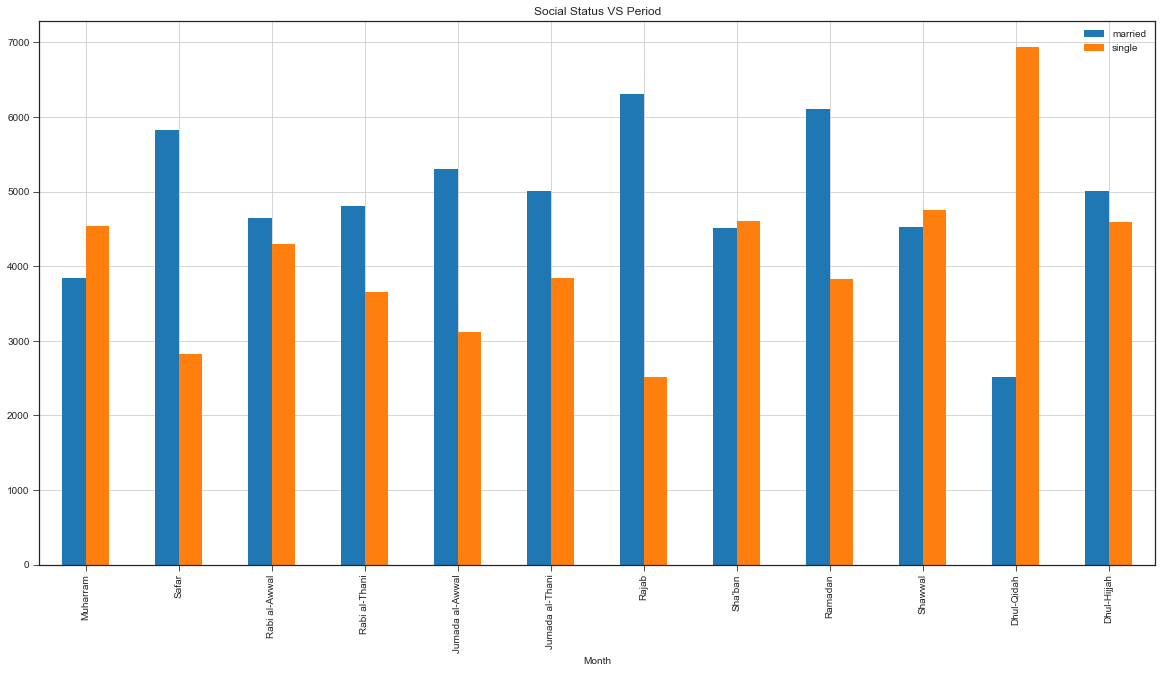

In [343]:
df1.plot(x='Month', y=['married','single'], figsize=(20,10), grid=True,kind="bar")
plt.title('Social Status VS Period')

Text(0.5, 1.0, 'Age VS Period')

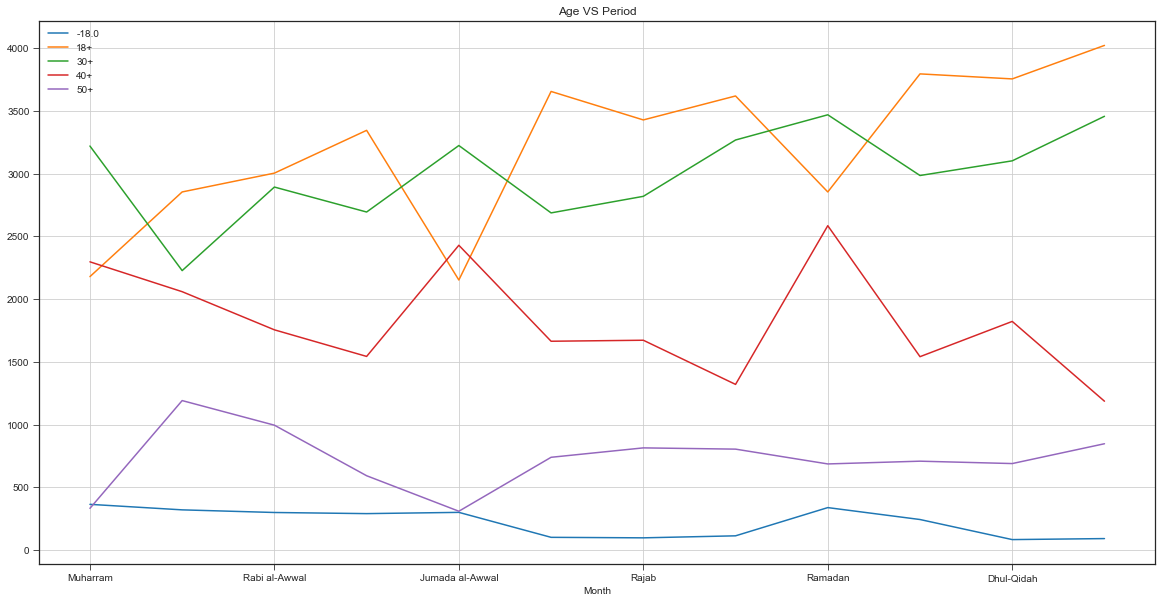

In [344]:
df1.plot(x='Month', y=['-18.0','18+','30+','40+','50+'], figsize=(20,10), grid=True)
plt.title('Age VS Period')

Text(0.5, 1.0, 'valid license VS expired license')

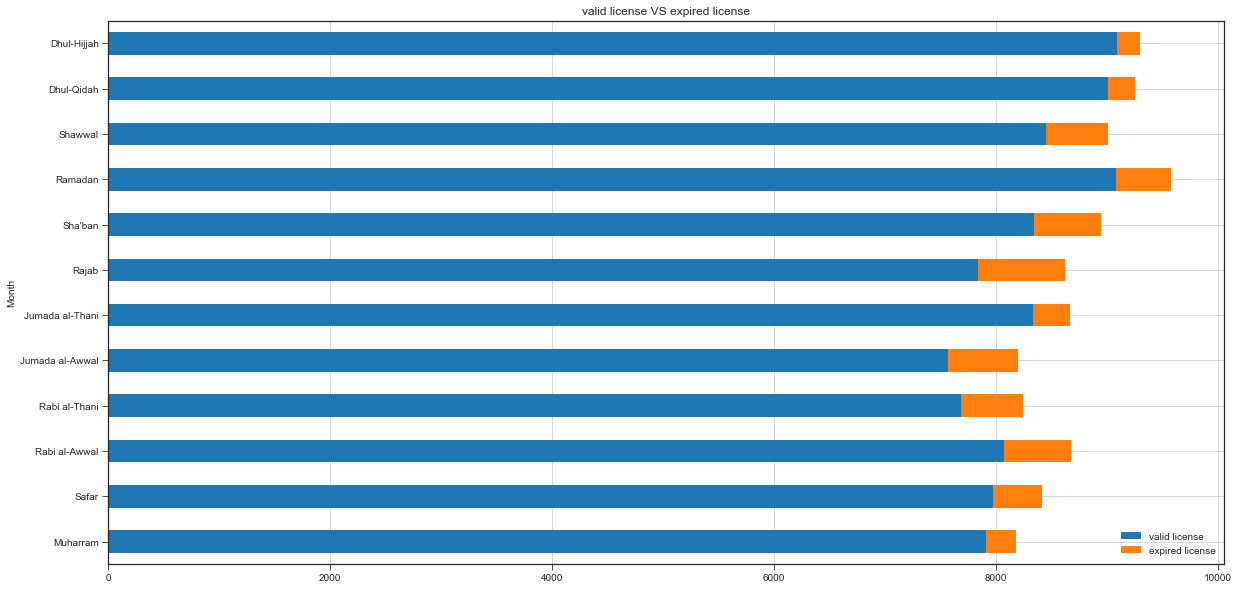

In [346]:
df1.plot(x='Month', y=['valid license','expired license'], figsize=(20,10), grid=True,kind="barh",stacked=True)
plt.title('valid license VS expired license')

# Arabic Visualization

### Sometimes plots dont support arabic language if you faced this issue you need to install specific libraries 

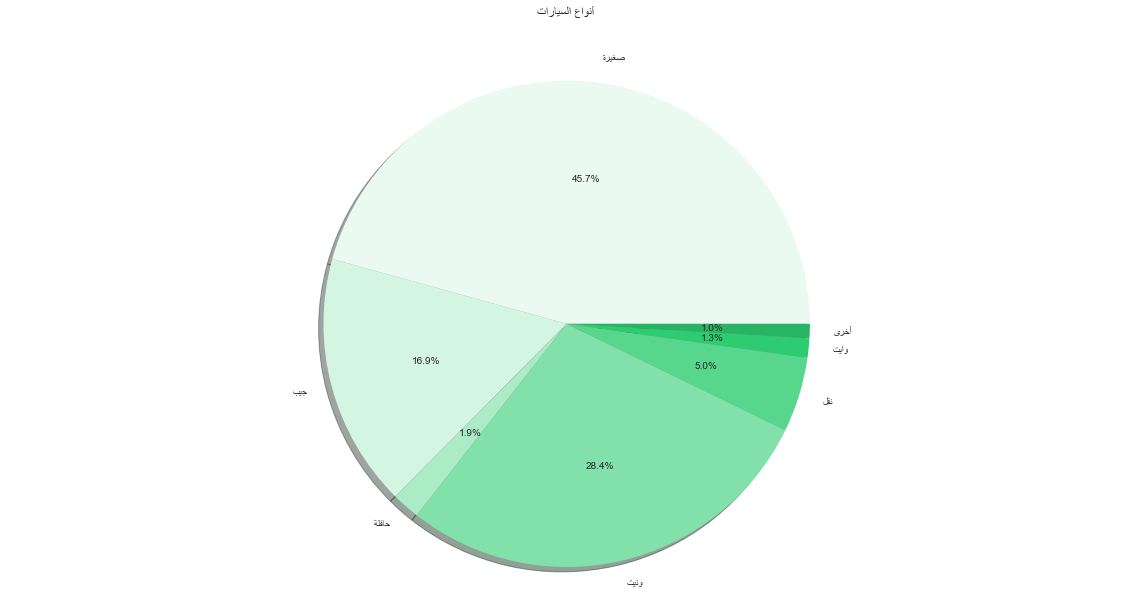

In [322]:
# create a visualization
a = get_display( arabic_reshaper.reshape('صغيرة'))
b = get_display( arabic_reshaper.reshape('جيب'))
c = get_display( arabic_reshaper.reshape('حافلة'))
d = get_display( arabic_reshaper.reshape('ونيت'))
e = get_display( arabic_reshaper.reshape('نقل'))
f = get_display( arabic_reshaper.reshape('وايت'))
g = get_display( arabic_reshaper.reshape('أخرى'))
labels = a,b,c,d,e,f,g
sizes = [49616.0, 18292.0, 2030.0,30785.0,5396.0,1394.0,1034.0]
colors = ['#EAFAF1', '#D5F5E3', '#ABEBC6', '#82E0AA','#58D68D','#2ECC71','#28B463'] 
explode = (0, 0, 0, 0,0,0,0)
plt.rcParams["figure.figsize"] = (20,10)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
titl = get_display( arabic_reshaper.reshape('أنواع السيارات'))
plt.title(titl, y=1.05)
plt.axis('equal')
plt.show()

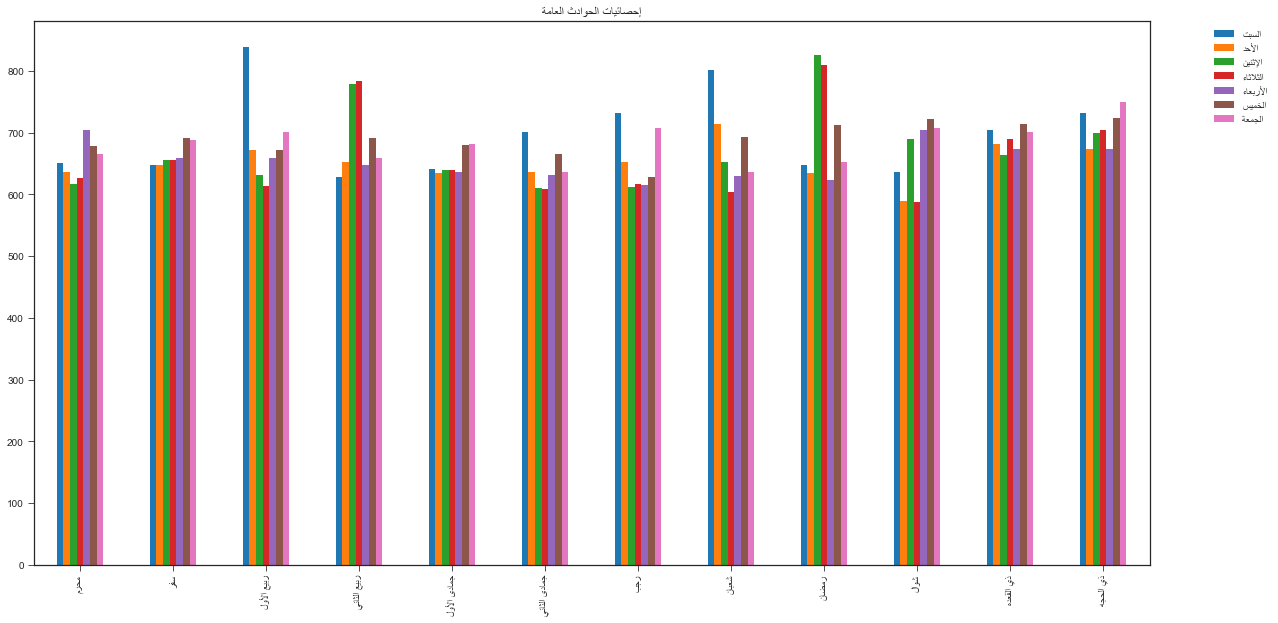

In [323]:
# 2 # create an arabic visualization for change

m1 = get_display( arabic_reshaper.reshape('محرم'))
m2 = get_display( arabic_reshaper.reshape('سفر'))
m3 = get_display( arabic_reshaper.reshape('ربيع الأول'))
m4 = get_display( arabic_reshaper.reshape('ربيع الثاني'))
m5 = get_display( arabic_reshaper.reshape('جمادى الأول'))
m6 = get_display( arabic_reshaper.reshape('جمادى الثاني'))
m7 = get_display( arabic_reshaper.reshape('رجب'))
m8 = get_display( arabic_reshaper.reshape('شعبان'))
m9 = get_display( arabic_reshaper.reshape('رمضان'))
m10 = get_display( arabic_reshaper.reshape('شوال'))
m11 = get_display( arabic_reshaper.reshape('ذي القعده'))
m12 = get_display( arabic_reshaper.reshape('ذي الحجه'))
d1 = get_display( arabic_reshaper.reshape('السبت'))
d2 = get_display( arabic_reshaper.reshape('الأحد'))
d3 = get_display( arabic_reshaper.reshape('الإثنين'))
d4 = get_display( arabic_reshaper.reshape('الثلاثاء'))
d5 = get_display( arabic_reshaper.reshape('الأربعاء'))
d6 = get_display( arabic_reshaper.reshape('الخميس'))
d7 = get_display( arabic_reshaper.reshape('الجمعة'))
f1 = np.array(df1["saturday"])
f2 = np.array(df1["sunday"])
f3 = np.array(df1["monday"])
f4 = np.array(df1["tuesday"])
f5 = np.array(df1["wednesday"])
f6 = np.array(df1["thursday"])
f7 = np.array(df1["friday"])
index = [m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12]
df = pd.DataFrame({d1: f1,
                   d2: f2,
                   d3: f3,
                   d4: f4,
                   d5: f5,
                  d6: f6,
                  d7: f7,}, index=index)
plt.rcParams["figure.figsize"] = (20,10)
titl2= get_display( arabic_reshaper.reshape('إحصائيات الحوادث العامة'))
ax = df.plot.bar(title=titl2).legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [324]:
df11.tail(1)

,الشهر,حادث تلفيات,حادث اصابات,حادث وفيات,مجموع عدد الحوادث,السبت,الا حد,الاثنين,الثلاثاء,الا ربعاء,الخميس,الجمعة,مجموع عدد الحوادث لجميع الأيام,نهارا,ليلا,مجموع عدد الحوادث حسب الوقت,داخل المدينة,خارج المدينة,مجموع عدد الحوادث حسب مكان الحادث,صغيرة,جيب,حافلة,ونيت,نقل,وايت,اخرى,مجموع عدد السيارات المشتركة في الحوادث حسب الطراز,-18.0,18+,30+,40+,50+,المجموع حسب العمر,سعودي,اجنبي,المجموع حسب الجنسية,متزوج,اعزب,المجموع حسب الحالة الاجتماعية,متعلم,امى,المجموع حسب الحالة التعليمية,نوع الرخصة خصوصى,نوع الرخصة عمومى,نوع الرخصة اليات,نوع الرخصة دراجة,السائق لا يحمل رخصة قيادة,المجموع,السائق لا يحمل رخصة قيادة.1,الرخصة سارية,الرخصة منتهية,المجموع.1,تصادم مع سيارة,تصادم مع جسم ثابت,دهس مشاة,دهس حيوان,حريق,انقلاب,خروج عن الطريق,أخرى,المجموع.2,توقف غير نظامى,دوران غير نظامى,تجاوز غير نظامى,عدم التقيد بالاشارة,السرعة الزائدة,السائق تحت تأثير مخدر,اخرى.1,مجموع الحوادث حسب سبب الحادث,عدد المصابين,عدد المتوفين (القتلى),سليم,مجموع الأشخاص المشمولين بالحوادث
12,المجموع,54569.0,1215.0,727.0,56511.0,8357.0,7823.0,8074.0,7939.0,7857.0,8275.0,8186.0,56511.0,33624.0,22887.0,56511.0,38230.0,18281.0,56511.0,49616.0,18292.0,2030.0,30785.0,5396.0,1394.0,1034.0,108547.0,2639.0,38662.0,36045.0,21873.0,8706.0,107925.0,74931.0,32994.0,107925.0,58409.0,49516.0,107925.0,106297.0,1628.0,107925.0,71327.0,30404.0,973.0,2360.0,2861.0,107925.0,2861.0,99338.0,5726.0,107925.0,52204.0,792.0,547.0,20.0,4.0,516.0,1261.0,1167.0,56511.0,6357.0,8076.0,3627.0,6046.0,11236.0,0.0,21169.0,56511.0,3114.0,969.0,108837.0,112920.0


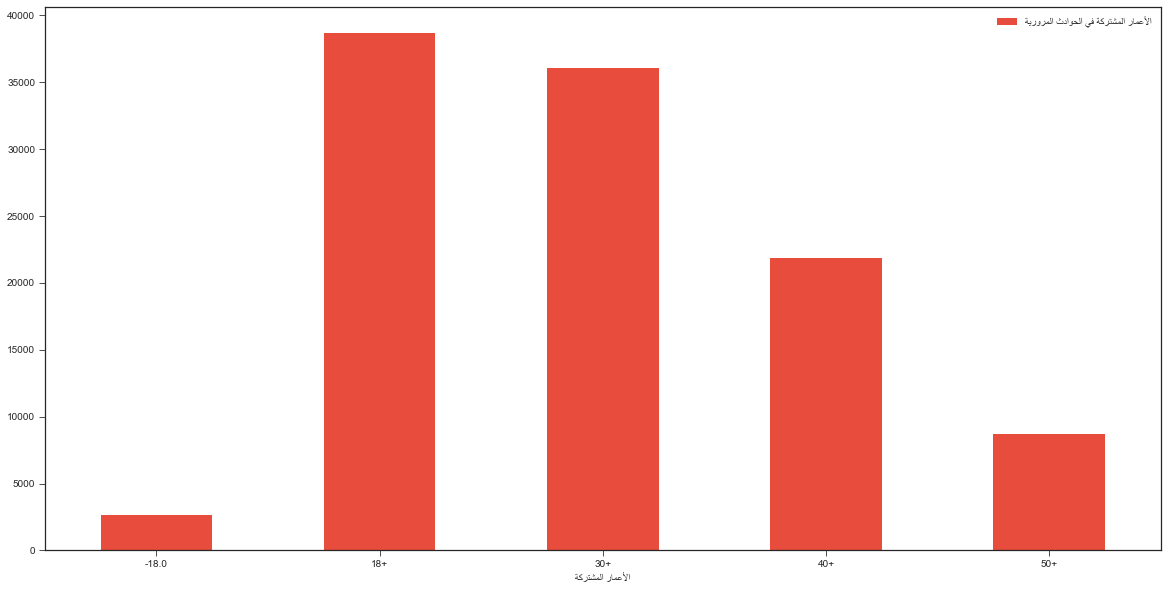

In [332]:
# create a visualization
aaa = get_display( arabic_reshaper.reshape('الأعمار المشتركة'))
a = get_display( arabic_reshaper.reshape('-18.0'))
b = get_display( arabic_reshaper.reshape('18+'))
c = get_display( arabic_reshaper.reshape('30+'))
d = get_display( arabic_reshaper.reshape('الأعمار المشتركة في الحوادث المرورية'))
f = get_display( arabic_reshaper.reshape('40+'))
e = get_display( arabic_reshaper.reshape('50+'))
df = pd.DataFrame({aaa:[a, b, c,f,e], d:[2639.0,38662.0,36045.0,21873.0,8706.0]})
figsize=(20,10)
ax = df.plot.bar(x=aaa, y=d, rot=0, color='#E74C3C')